<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / Assingment 3*

---
# Neural Network Framework (Keras)




## 기본과제
### 케라스 라이브러리를 사용하여 Multi-Layer Perceptron 모델을 CIFAR100 데이터에 적용해보세요.

- 시드를 고정하십시오.
- 데이터를 Noramlized 해줍니다. 
- 케라스에서 모델은 다음과 같이 고정합니다. 
- 활성함수는 ReLU를 사용합니다.
- 단계별로 오늘 배운 규제방법을 적용해봅니다. 


### 문제에 기록된 텍스트를 꼭! 잘 읽어보고 답변을 다셔야 합니다.

In [ ]:
##### Base #####

import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50

# 데이터 불러오기
np.random.seed(1)
tf.random.set_seed(1)
(X_train, y_train), (X_test, y_test) = cifar100.load_data()


## 1) X_train, y_train의 Data형태를 출력해서 matrix 구조 [N, x, y, c]를 확인하고 입력해보세요.

### 문항 1-1). 데이터의 구조를 출력하기 위한 코드를 입력하세요.

### 문항 1-2). Flatten(input_shape=()) 에 들어갈 데이터 형태를 입력하세요.

In [ ]:
##### Your Code Here #####


[(50000, 32, 32, 3), (50000, 1)]

Base model을 제작합니다.

In [ ]:
# Step 1. Basic Model

# 변수 설정을 따로 하는 방법을 적용하기 위한 코드입니다. 
batch_size = 100
epochs_max = 20

# model
model = Sequential()
model.add(Flatten(input_shape=(##### Your Code Here #####))) ## 문제 1의 데이터구조에서 확인한 내용을 잘 입력하세요
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_train, y_train, epochs=epochs_max, batch_size=batch_size, verbose=1, validation_data=(X_test,y_test))

In [ ]:
model.predict(X_test[0:1])
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 3.3582 - accuracy: 0.2062


## 2) 최종 모델에서 model.evaluate을 통해서 결과를 출력해보세요.  
### 문항 2-1). verbose=0 으로 입력해서 출력되는 accuracy를 입력하세요.
### 문항 2-2). verbose=1 으로 입력해서 출력되는 accuracy를 입력하세요. <Br>
(차이점을 아시겠나요? 차이점을 모른다면 검색해보세요. 정답에 공백을 입력할 수 있어야 합니다.)



In [ ]:
# Step 2. Basic Model + Weight Decay

# 변수 설정을 따로 하는 방법을 적용하기 위한 코드입니다. 
batch_size = 100
epochs_max = 20

# model
model = Sequential()
model.add(Flatten(input_shape=(##### Your Code Here #####)))
model.add(Dense(128, activation='relu', 
                kernel_regularizer=regularizers.l2(0.00001),    # L2 norm regularization
                activity_regularizer=regularizers.l1(0.00001) )) # L1 norm regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_train, y_train, epochs=epochs_max, batch_size=batch_size, verbose=1, validation_data=(X_test,y_test))

## 3) Dropout을 사용하기 위해서는 라이브러리 추가로 불어와야 합니다. 

### 문항 3) Dropout의 라이브러리를 호출하기 위해서 사용한 import 문구를 적어주세요.

In [ ]:
# Step 3. Basic Model + Dropout

##### Your Code Here #####


# 변수 설정을 따로 하는 방법을 적용하기 위한 코드입니다. 
batch_size = 100
epochs_max = 20

# model
model = Sequential()
model.add(Flatten(input_shape=(##### Your Code Here #####)))
model.add(Dense(128*1.1, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_train, y_train, epochs=epochs_max, batch_size=batch_size, verbose=1, validation_data=(X_test,y_test))


### 문항 4) Early Stopping을 사용할 수 있도록 강의자료에서 코드를 잘 발췌해서 사용하시고, 50개의 Epoch를 돌렸을 때 Stop된 epoch 숫자를 입력하세요

In [ ]:
# Step 4. Basic Model + Early Stopping

# 학습시킨 데이터를 저장시키기 위한 코드입니다. 
checkpoint_filepath = "FMbest.hdf5"

X_train = X_train / 255.
X_test = X_test / 255.

model = Sequential()
model.add(Flatten(input_shape=(##### Your Code Here #####)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# early stopping
early_stop = ##### Your Code Here #####

# Validation Set을 기준으로 가장 최적의 모델을 찾기
save_best = keras.callbacks.ModelCheckpoint(##### Your Code Here #####)

results = model.fit(##### Your Code Here #####)

In [ ]:
# 학습된 모델을 이용하여 테스트하는 코드

model.predict(X_test[0:1])
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

313/313 - 1s - loss: 3.4137 - accuracy: 0.1889


In [ ]:
model.load_weights(checkpoint_filepath)
# best model을 이용한 테스트 데이터 예측 정확도 재확인 코드

model.predict(X_test[0:1])
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

## 도전과제

- 하이퍼 파라미터 튜닝을 사용하여 모델의 정확도를 최대한 높여보세요.
- 교차 검증(CV) 기법을 사용하여 모델과 조금 더 일관된 결과를 얻어보세요.
- 아직 이론을 배우진 않았지만, Cifar100의 분류문제를 효율적으로 찾기위한 방법을 찾아보세요. 
- 대부분의 문제풀이는 CNN을 통해서 해결했을 것입니다. 
- 이제 코드를 보는 방법이 조금씩 익숙해졌기 때문에 다른 사람들이 돌려놓은 파일을 이해해서 돌아가는 샘플코드를 만들어볼 수 있을 것입니다. 
- 남들이 작성해두었고, 돌아가는 코드를 찾아서 변환하는 것이기 때문에 CNN이라고 해서 어려울 것은 없습니다. 
- 아직 원리를 모르지만, cifar100 데이터셋을 이용하여 CNN 모델을 구축하고 기본적인 신경망의 결과와 비교해 보십시오. 
- [참조링크](https://www.kaggle.com/adi160/cifar-10-keras-transfer-learning)


In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

batch_size = 2000
num_classes = 100
epochs = 20

# 데이터 불러오기
np.random.seed(1)
tf.random.set_seed(1)
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = X_train.astype('float32') / 255.0 - 0.5
X_test = X_test.astype('float32') / 255.0 - 0.5

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.2)

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
[X_train.shape, y_train.shape]

[(40000, 32, 32, 3), (40000, 100)]

In [ ]:
# transfer
from keras.applications import VGG19, ResNet50
from tensorflow.keras.optimizers import Adam, SGD

base_model_1 = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=y_train.shape[1])

model_1= Sequential()
model_1.add(base_model_1) 
model_1.add(Flatten()) 

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
# model_1.add(Dropout(.3)) #Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
# model_1.add(Dropout(.2))
model_1.add(Dense(num_classes,activation=('softmax'))) #This is the classification layer

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 100)              

In [ ]:
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

model_1.fit(X_train, y_train, batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    epochs=epochs, verbose=1)



Epoch 1/50
1250/1250 [==============================] - 47s 24ms/step - loss: 4.0798 - accuracy: 0.0892 - val_loss: 2.7171 - val_accuracy: 0.2910
Epoch 2/50
1250/1250 [==============================] - 30s 24ms/step - loss: 2.5542 - accuracy: 0.3286 - val_loss: 2.2769 - val_accuracy: 0.3923
Epoch 3/50
1250/1250 [==============================] - 30s 24ms/step - loss: 2.0954 - accuracy: 0.4273 - val_loss: 2.0757 - val_accuracy: 0.4449
Epoch 4/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.7989 - accuracy: 0.4984 - val_loss: 2.0754 - val_accuracy: 0.4464
Epoch 5/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.5617 - accuracy: 0.5541 - val_loss: 1.9458 - val_accuracy: 0.4854
Epoch 6/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.3625 - accuracy: 0.6018 - val_loss: 1.8181 - val_accuracy: 0.5159
Epoch 7/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1693 - accuracy: 0.6561 - val_loss: 1.8012 -

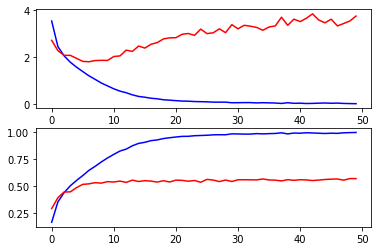

In [ ]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(model_1.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model_1.history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(model_1.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model_1.history.history['val_accuracy'],color='r',label='Validation Accuracy')

In [ ]:
model_1.predict(X_test)
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 3s 8ms/step - loss: 3.7550 - accuracy: 0.5693
